In [1]:
import numpy as np
# Solving the first iteration of Lasso GD by "hand"
x = np.array([[0], [1], [2], [3]])
y = np.array([[0], [1], [1], [2]])

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x)
Phi
# note that this puts the columns in a different order, so I'll want to flip my starting w

array([[1., 0., 0.],
       [1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [2]:
w0 = np.array([[1],[0],[0]])
lam = .2
eta = .01

# Perform the first step of gradient descent
# need the derivative
def dfd(w):
    n = Phi.shape[0]
    return (2/n) * np.matmul(Phi.T, np.matmul(Phi, w) - y) + lam * np.sign(w)

# take the step
w1 = w0 - eta * dfd(w0)
print(f'First step of Lasso GD: {w1}')

First step of Lasso GD: [[0.998]
 [0.015]
 [0.045]]


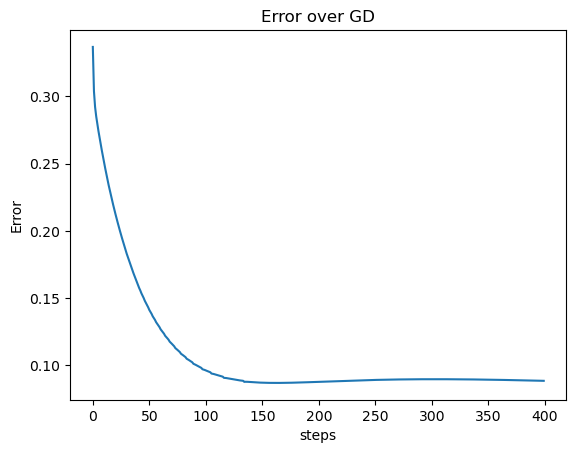

In [3]:
import matplotlib.pyplot as plt
# now, doing it over and over again
w = w0

def mse(w, Phi, y):
    n = Phi.shape[0]
    p = (np.dot(Phi,w) - y)
    return (1/n)*np.dot(np.transpose(p), p).item()

error_list = []
for i in range(400):
    w = w - eta * dfd(w)
    err = mse(w, Phi, y)
    error_list.append(err)

# make sure it's converging
plt.plot(error_list)
plt.title('Error over GD')
plt.xlabel('steps')
plt.ylabel('Error')
plt.show()

In [4]:
print(f'Final w: {w}')

Final w: [[0.18126255]
 [0.07690599]
 [0.17666319]]


In [5]:
# Note, the prediction error is calculated by "plugging in" the observed x values into the estimated f(x)
# Then, calculating the MSE involves the current value of w and the observed x values to get the predictions
# Also note: the "error" for the problem is still the MSE (we don't worry about the constraint for the purposes of assessing model fit)

In [6]:
# Python code that runs regularized regression without needing to code your own gradient descent
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

X = np.array([[1,1],
              [2,1],
              [1,1],
              [3,1],
              [2,1],
              [6,1],
              [2,1],
              [0,1],
              [2,1],
              [1,1]])

w = np.array([[3], [2]])
np.random.seed(42)
y = X.dot(w) + np.random.randn(10,1)

In [7]:
# Fit the simple linear regression,
OLS_model = LinearRegression().fit(X[:,0].reshape(-1,1),y)
pred_y = OLS_model.predict(X[:,0].reshape(-1,1))

In [8]:
OLS_w = np.hstack([OLS_model.coef_[0], OLS_model.intercept_[0]])

In [9]:
x_line = np.vstack([np.linspace(0, 6, 100), np.ones(100)]).T
OLS_fit = x_line.dot(OLS_w)

In [10]:
# Fit the 5th degree Polynomial Regression
poly = PolynomialFeatures(5)
newX = poly.fit_transform(X[:,0].reshape(-1,1))
Poly_model = LinearRegression().fit(newX[:,1:], y)
pred_y2 = Poly_model.predict(newX[:,1:])

# Create the line for plotting
Poly_w = np.hstack([Poly_model.intercept_[0], Poly_model.coef_[0]]) #note different order because of PolynomialFeatures
x_line2 = poly.fit_transform(np.linspace(0, 6, 100).reshape(-1,1))
Poly_fit = x_line2.dot(Poly_w)

In [11]:
# Fit the 5th degree Polynomial (with Lasso penalty) Regression
# This can take a few parameters, but the the most important is "alpha" (which is the hyperparameter lambda from the notes)
# Replace with the Ridge function to use the Ridge penalty
Lasso_model = Lasso(alpha = .1, max_iter=10000).fit(newX[:,1:], y)
pred_y3 = Lasso_model.predict(newX[:,1:])

# Create the line for plotting
Lasso_w = np.hstack([Lasso_model.intercept_[0], Lasso_model.coef_])
Lasso_fit = x_line2.dot(Lasso_w)

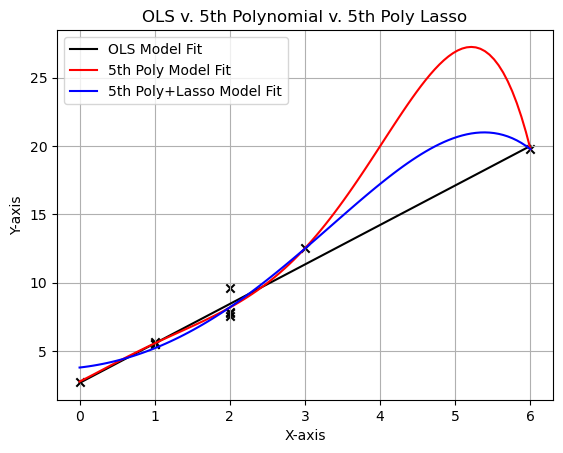

In [12]:
plt.scatter(X[:,0], y, color = 'black', marker = 'x')
plt.plot(x_line[:,0], OLS_fit, linestyle='-', color='black', label='OLS Model Fit')
plt.plot(x_line[:,0], Poly_fit, linestyle='-', color='red', label='5th Poly Model Fit')
plt.plot(x_line[:,0], Lasso_fit, linestyle='-', color='blue', label='5th Poly+Lasso Model Fit')

# Labels and Legend and Show
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('OLS v. 5th Polynomial v. 5th Poly Lasso')
plt.legend()

plt.grid(True)
plt.show()